In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [10]:
import tensorflow as tf
print(tf.__version__)
%matplotlib inline

1.5.0


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensokeras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

AttributeError: module 'keras_applications' has no attribute 'set_keras_submodules'

In [9]:
image_gen=ImageDataGenerator(rotation_range=30,#rotate the image 30 degrees
                             width_shift_range=0.1,#shift the pic width by amax of 10%
                             height_shift_range=0.1,#shift the pic height by amax of 10%
                             rescale=1/255,#rescale tghe image by normalizing it
                             shear_range=0.2,#shear means cutting away part of the image(max 20%)
                             zoom_range=0.2,# Zoom in by 20% max
                             horizontal_flip=True,#allow horizontal flipping
                             fill_mode='nearest'#fill in  missing pixel with the nearest filled value
                            )

In [10]:
# width,height,channel
image_shape=(150,150,3)


Creating the Model

In [11]:
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D


In [13]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),
                activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),
                activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))


#DropOuts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of the Neurons

model.add(Dropout(0.5))
# Last layer for 0=beer and 1=pepsi
model.add(Dense(3))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',#Computes the cross-entropy loss between true labels and predicted labels.
             optimizer='adam',
             metrics=['accuracy'])

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [12]:
batch_size=16

train_image_gen=image_gen.flow_from_directory(r'C:\Harshil_Bhavsar\Beer_Cherry\Train',target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')



Found 1386 images belonging to 2 classes.


In [13]:
test_image_gen=image_gen.flow_from_directory(r'C:\Harshil_Bhavsar\Beer_Cherry\Test',target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 200 images belonging to 2 classes.


In [14]:
train_image_gen.class_indices

{'M.Beer': 0, 'P.Cherry': 1}

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
results=model.fit_generator(train_image_gen,epochs=10,
                           steps_per_epoch=25,
                           validation_data=test_image_gen,
                            validation_steps=12)

Epoch 1/10
25/25 [==============================] - 38s 2s/step - loss: 0.5659 - acc: 0.9300 - val_loss: 0.1159 - val_acc: 0.9688
Epoch 2/10
25/25 [==============================] - 35s 1s/step - loss: 0.1111 - acc: 0.9800 - val_loss: 0.2108 - val_acc: 0.9531
Epoch 3/10
25/25 [==============================] - 34s 1s/step - loss: 0.0837 - acc: 0.9875 - val_loss: 0.1278 - val_acc: 0.9740
Epoch 4/10
25/25 [==============================] - 36s 1s/step - loss: 0.0902 - acc: 0.9900 - val_loss: 0.0170 - val_acc: 0.9896
Epoch 5/10
25/25 [==============================] - 35s 1s/step - loss: 0.0285 - acc: 0.9950 - val_loss: 0.2087 - val_acc: 0.9479
Epoch 6/10
25/25 [==============================] - 32s 1s/step - loss: 0.0515 - acc: 0.9850 - val_loss: 0.1639 - val_acc: 0.9688
Epoch 7/10
25/25 [==============================] - 32s 1s/step - loss: 0.0097 - acc: 1.0000 - val_loss: 0.0923 - val_acc: 0.9896
Epoch 8/10
25/25 [==============================] - 35s 1s/step - loss: 0.0019 - acc: 1.00

In [20]:
model.save('Beer_Cherry.h5')

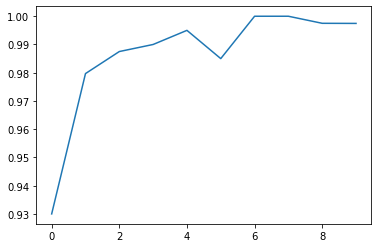

In [21]:
plt.plot(results.history['acc'])